In [28]:

library(selbal)
library(grid)
lod = function(f1='../feature_tables/genus_t70_ratio25.csv',
                f2='./target24.csv',
                f3='./covariates.csv') {
    x = as.matrix(read.table(f1, sep = ',', row.names=1, header=TRUE))
#    x <- x[rownames(x)!='195S1',]
    y = as.vector(read.table(f2, sep = ',', row.names=1, header=TRUE))
#    y <- y[rownames(y)!='195S1',]
    z = as.matrix(read.table(f3, sep = ',', row.names=1, header=TRUE))
#    z <- z[rownames(z)!='195S1',]
    #list('x'=x,'y'=y,'z'=z)
    list('x'=x,'y'=as.integer(unlist(y)),'z'=z)
}

In [2]:
sel = function(data, nvar=5, covar=TRUE, method='AUC') {
    if (covar==TRUE) {
        mod = selbal(data$x, as.factor(data$y), covar=data$z, logit.acc=method, maxV=nvar)
    }
    else {
        mod = selbal(data$x, as.factor(data$y), logit.acc=method, maxV=nvar)
    }
    (mod$balance.selection)
    mod
}

In [3]:
selcv = function(data, covar=TRUE, method='AUC') {
    if (covar==TRUE) {
        mod = selbal.cv(data$x, as.factor(data$y), covar=data$z, logit.acc=method )
    }
    else {
        mod = selbal.cv(data$x, as.factor(data$y), logit.acc=method, )
    }
    mod
}

NUMERATOR,DENOMINATOR,ACC,Increase
<chr>,<chr>,<dbl>,<dbl>
Hungatella,Parasutterella,0.82519,0.82519
Campylobacter,-,0.85630,0.03111
-,Eisenbergiella,0.89185,0.03556
-,Ezakiella,0.90667,0.01481


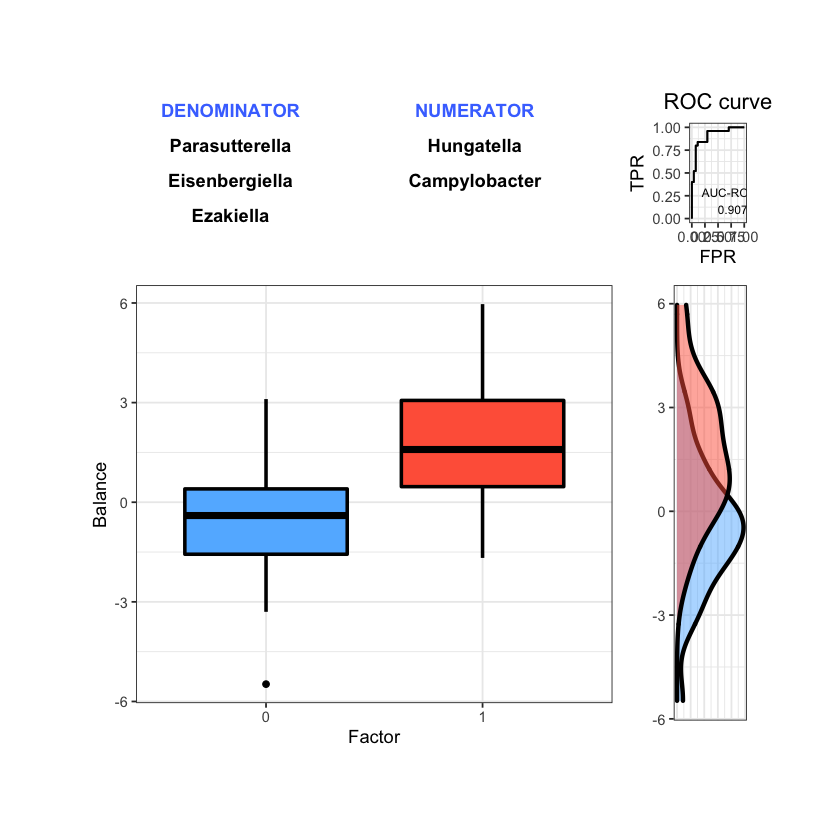

In [29]:
d=lod()
m=sel(d)
#m=sel(d,covar=FALSE)
m$balance.selection

NUMERATOR,DENOMINATOR,ACC,Increase
<chr>,<chr>,<dbl>,<dbl>
Hungatella,Parasutterella,0.27115,0.27115
Campylobacter,-,0.34865,0.07750
-,Eisenbergiella,0.39823,0.04958
-,Peptoniphilus,0.43382,0.03558


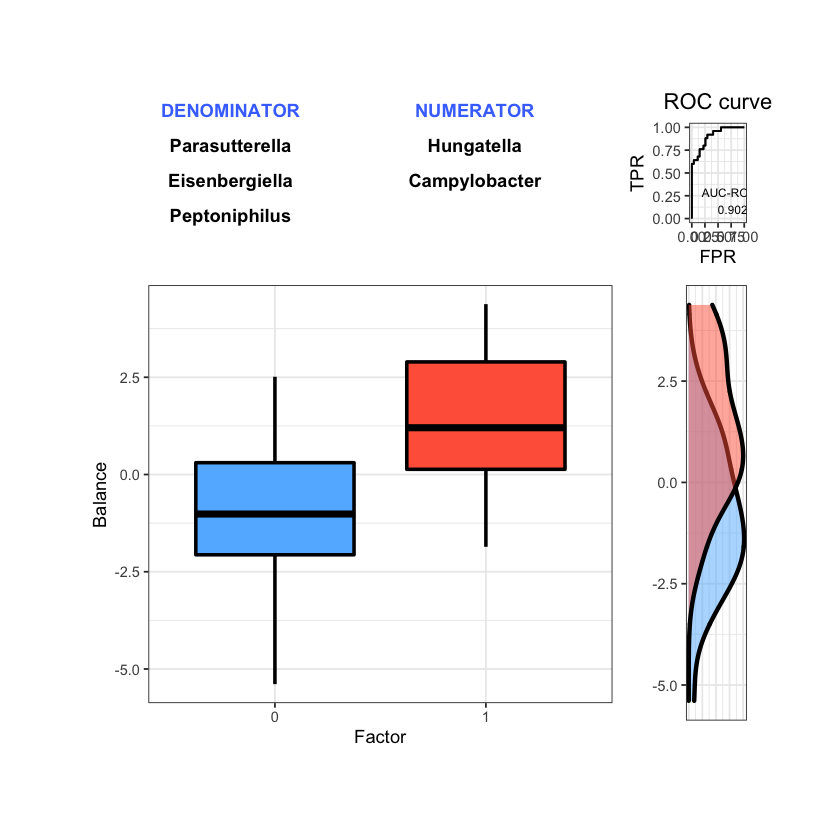

In [30]:
m=sel(d,method='Dev',covar=TRUE)
m$balance.selection

NUMERATOR,DENOMINATOR,ACC,Increase
<chr>,<chr>,<dbl>,<dbl>
Hungatella,Parasutterella,0.32398,0.32398
Campylobacter,-,0.40049,0.07652
-,Eisenbergiella,0.45842,0.05793
-,Ezakiella,0.49705,0.03863


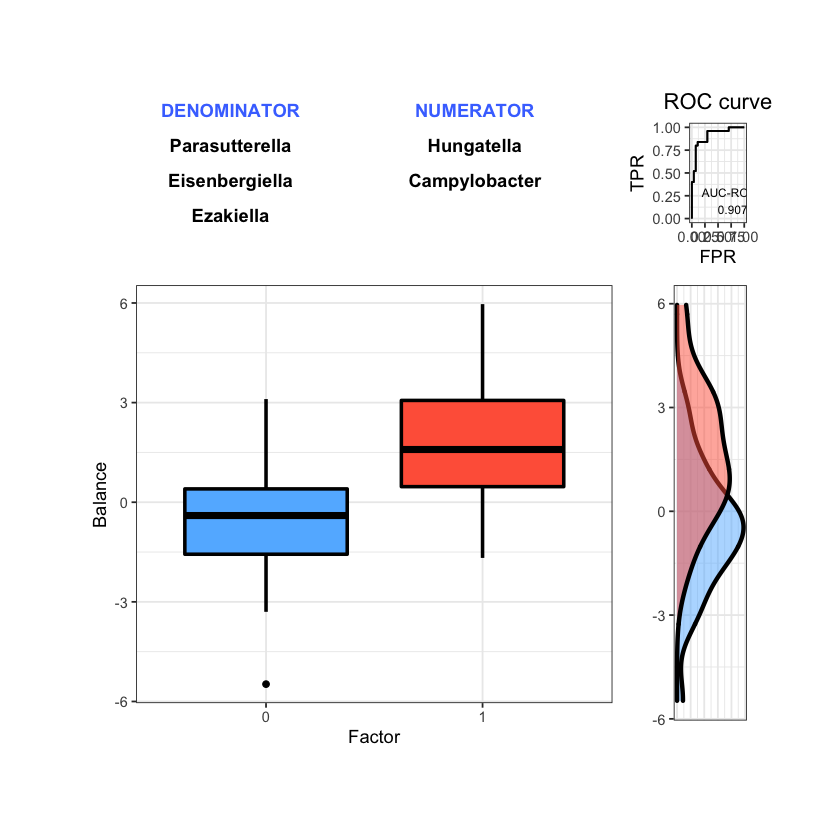

In [31]:
m=sel(d,method='Tjur',covar=TRUE)
m$balance.selection

NUMERATOR,DENOMINATOR,ACC,Increase
<chr>,<chr>,<dbl>,<dbl>
Hungatella,Parasutterella,0.32317,0.32317
Campylobacter,-,0.39330,0.07013
-,Eisenbergiella,0.45849,0.06519
-,Ezakiella,0.50688,0.04840


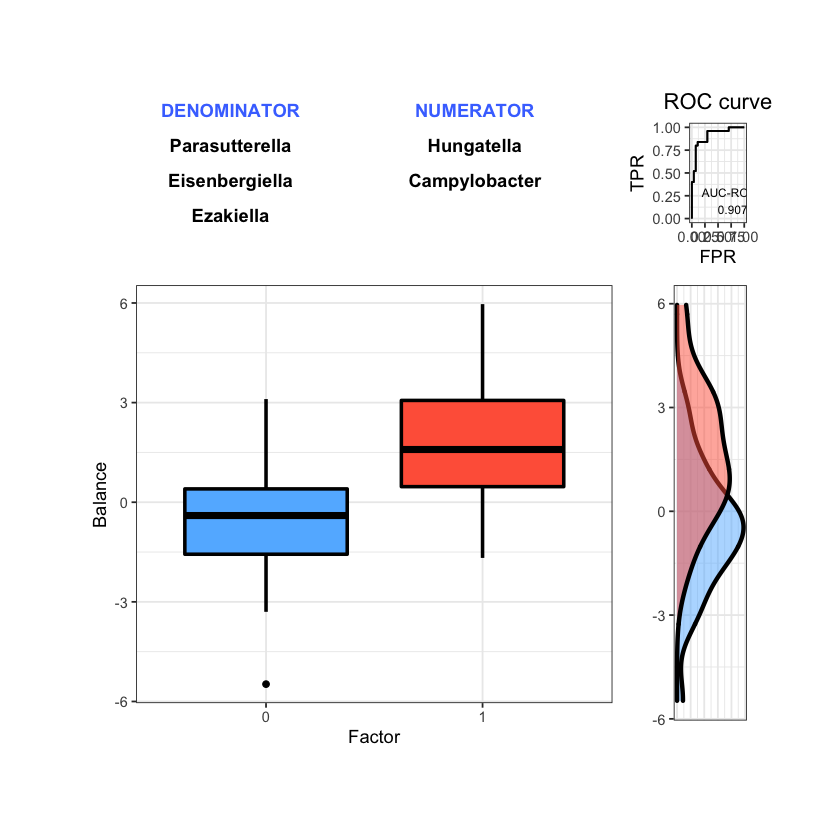

In [32]:
m=sel(d,method='Rsq',covar=TRUE)
m$balance.selection

In [20]:
mod=selcv(d,method='Rsq')
mod$cv.tab



############################################################### 
 STARTING selbal.cv FUNCTION 
###############################################################

#-------------------------------------------------------------# 
# ZERO REPLACEMENT . . .


, . . . FINISHED. 
#-------------------------------------------------------------#

#-------------------------------------------------------------# 
# Starting the cross - validation procedure . . .
 . . . finished. 
#-------------------------------------------------------------# 
###############################################################

 The optimal number of variables is: 3 



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message in xtfrm.data.frame(x):
"cannot xtfrm data frames"




############################################################### 
 . . . FINISHED. 
###############################################################

,%,Global,V3,V16,V13
,<chr>,<chr>,<chr>,<chr>,<chr>
Parasutterella,92,DEN,DEN,DEN,DEN
Hungatella,56,NUM,NUM,0,0
Campylobacter,54,NUM,NUM,0,NUM
Enterobacteriaceae,36,0,0,NUM,NUM
Erysipelatoclostridium,22,0,0,NUM,0
FREQ,-,-,0.4,0.14,0.08


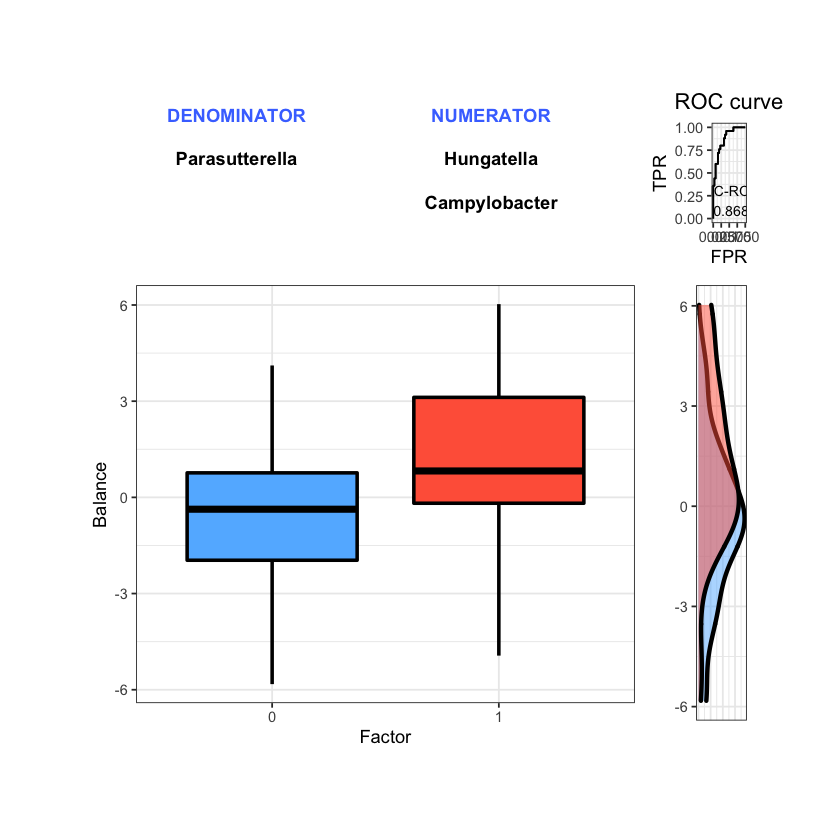

In [21]:
grid.draw(mod$global.plot)

In [16]:
mod$glm


Call:  glm(formula = numy ~ ., family = f.class, data = U)

Coefficients:
(Intercept)       APACHE          Age           V1  
    -5.0736       0.1323       0.0264       0.3635  

Degrees of Freedom: 51 Total (i.e. Null);  48 Residual
Null Deviance:	    71.78 
Residual Deviance: 54.86 	AIC: 62.86

In [18]:
names(m)

[1] "balance.values"    "numerator"         "denominator"      
 [4] "balance"           "accuracy"          "balance.selection"
 [7] "global.plot"       "glm"               "global.plot2"     
[10] "ROC.plot"

In [20]:
write.csv(m$balance.values,file='mbal.csv')

In [27]:
pdf("mbal0.pdf",
 #   width=3,
 #   height=3,
    paper='a4',
    colormodel='cmyk',
    points=7,
    )
mod$accuracy.nvar
mod$global.plot
mod$ROC.plot
mod$var.barplot
dev.off()
pdf("mbal0table.pdf",
    points=7,
    colormodel='cmyk',
)
plot.tab(mod$cv.tab)
dev.off()

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

pdf 
  2

pdf 
  2

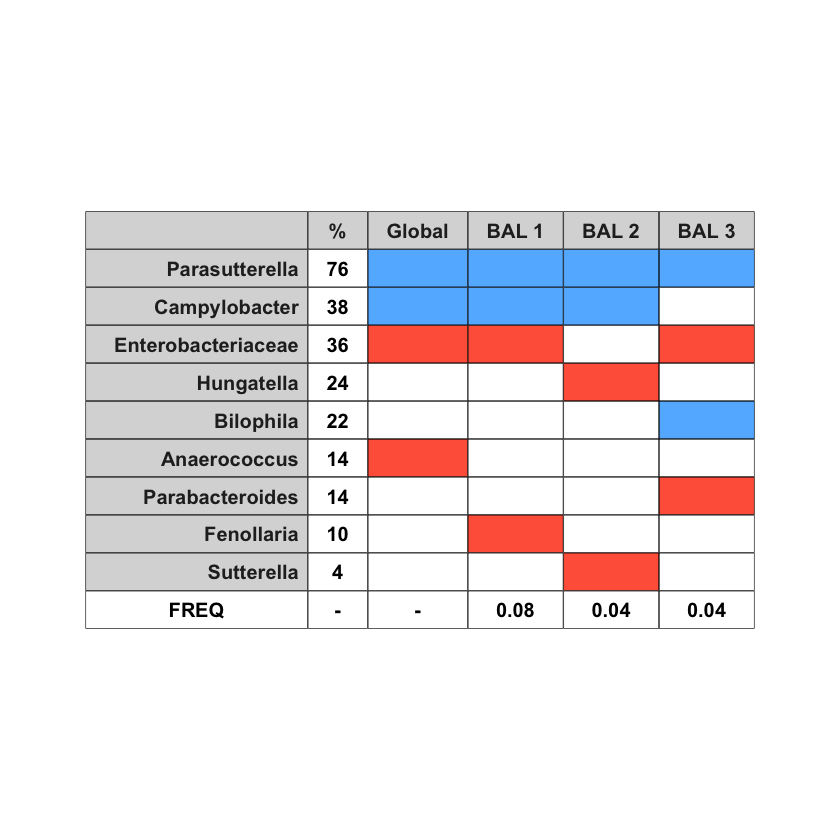

In [19]:
plot.tab(mod$cv.tab)